In [1]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys-dmm/')
from src.utils.auxiliary import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from projects.ephys.population import Population
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
mpl.rcParams.update({'font.size': 25})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
from src.utils.auxiliary import flatten_series
from scipy import stats

In [6]:
%matplotlib inline

In [7]:
hffm_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'
hffm_pop = Population(hffm_savepath)
hffm_pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


In [8]:
ltdk_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_lightdark/'
ltdk_pop = Population(ltdk_savepath)
ltdk_pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_lightdark/pooled_ephys_population_update_120621.pickle


In [9]:
gratfrac = {}
for i, name in enumerate(['early','late','biphasic','negative']):
    clust = hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==name]
    frac = len(clust[clust['responsive_to_gratings']]) / len(clust)
    gratfrac[name] = frac

In [10]:
gratfrac

{'early': 0.5833333333333334,
 'late': 0.4,
 'biphasic': 0.23655913978494625,
 'negative': 0.31683168316831684}

## figure 3

In [ ]:
# eye saccade response raster
# add overlayed PSTH
u = 447
sp = np.array(hffm_pop.data.loc[u1,'fm1_spikeT'])
ns = np.zeros(len(left)+1)
for n, s in enumerate(left):
    sd = np.abs(sp-np.array(s))<1
    sacc_sp = sp[sd]
    ns = len(sacc_sp)
    ax_u1_dEye_raster.vlines(sacc_sp-np.array(s), n-0.5, n+0.5, color='k')
ax_u1_dEye_raster.set_xlim([-0.2,0.4])
ax_u1_dEye_raster.vlines(0, 0, len(left), linestyles='dotted', color='tab:red')
ax_u1_dEye_raster.invert_yaxis()
ax_u1_dEye_raster.set_ylabel('left dEye')
ax_u1_dEye_raster.set_title('unit 1')

In [ ]:
# mean neural respones to prefered direction

In [ ]:
# PCA of eye movement KMeans clusters


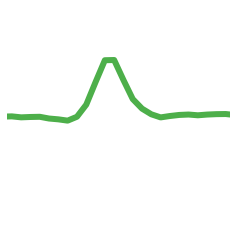

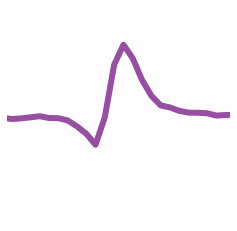

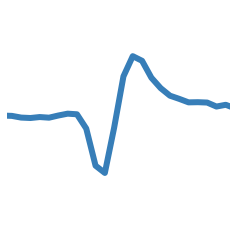

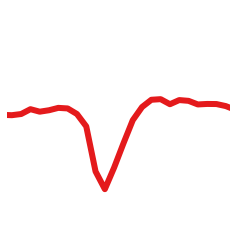

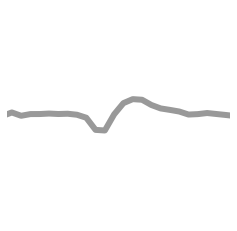

In [12]:
# schematic version of mean eye response for each cluster
# use this as an overlay in the PCA plot of clusters
for i in range(5):
    label = ['early','late','biphasic','negative','unresponsive'][i]
    c = hffm_pop.cmap_movclusts[i+1]
    plt.figure(figsize=(4,4))
    cluster_mean = np.nanmean(flatten_series(hffm_pop.data['norm_deflection_at_pref_direction'][hffm_pop.data['movement_psth_type_simple']==label]), 0)
    plt.plot(hffm_pop.trange_x, cluster_mean, color=c, linewidth=6)
    plt.axis('off'); plt.xlim([-0.2,0.4]); plt.ylim([-0.6,0.6])
    plt.savefig('/home/niell_lab/Desktop/cluster'+str(i)+'.pdf')
    plt.show()

In [ ]:
# eye movement responses
# columns: early, late, biphasic, negative, and unresponsive
# rows: gaze-shifting, non-prefered gaze-shifting, compensatory

In [ ]:
# four response types

In [ ]:
# density line histogram of depth for dEye response clusters

In [ ]:
# cell type by cluster

In [ ]:
# eye movement modulation index by movement type and movement cluster
# pref gaze-shift MI vs non-pref gaze-shift MI

## figure 4

In [8]:
# columns: CRF (w/ mean of only responsive units), contrast MI by depth line histogram density
# rows: early, late, biphasic, negative, unresponsive
fig4p1 = plt.figure(constrained_layout=True, figsize=(8.5,3))
spec4p1 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig4p1)

<Figure size 612x216 with 0 Axes>

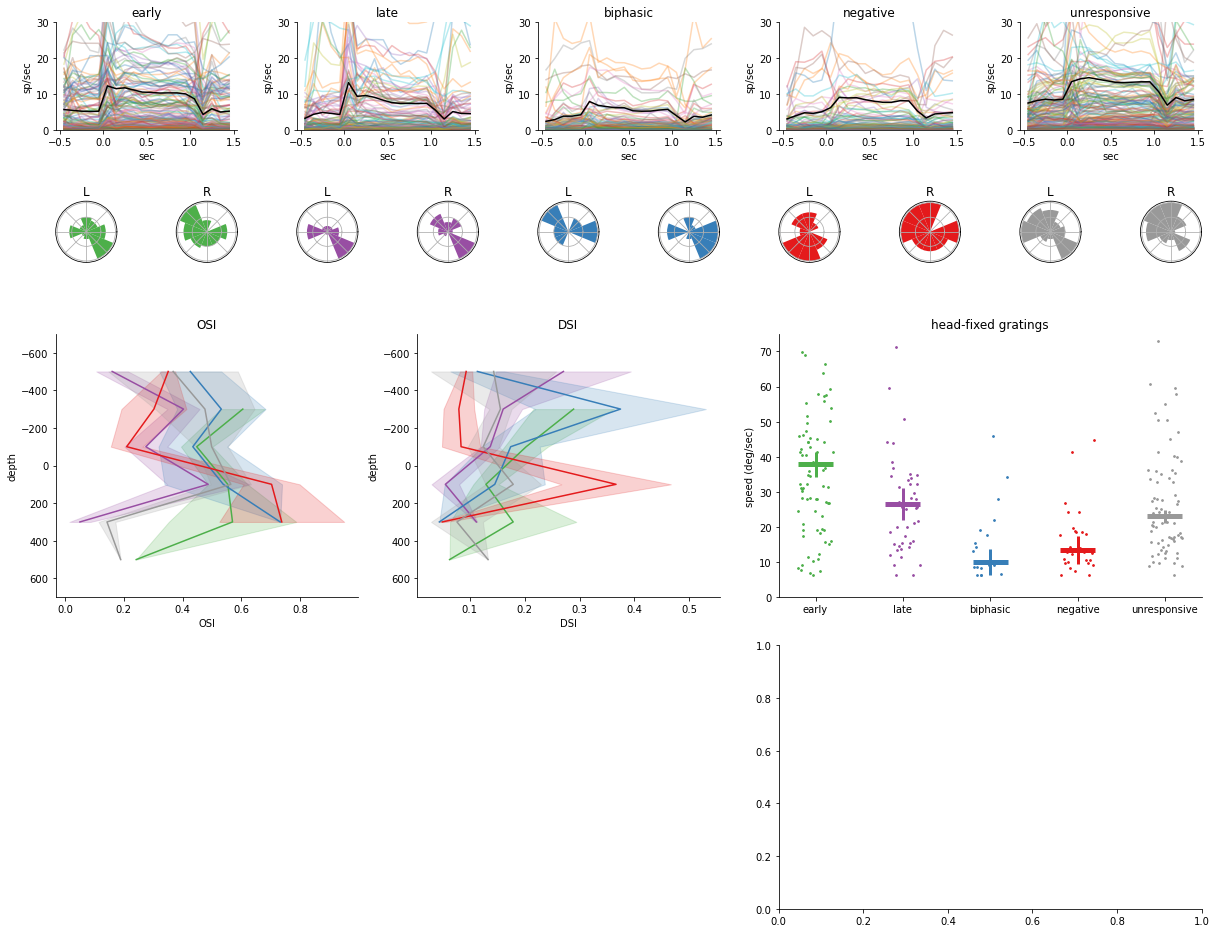

In [14]:
# rows: gratings PSTH (w/ mean of only responsive units),
# two polar histograms for left and right directions of saccade preference showing hf direction selectivity for those units,
# line density hist of OSI, line density hist of DSI, line density plot of speed preferenence
# fraction of transverse PSTH neurons in each cluster

fig4p2 = plt.figure(constrained_layout=True, figsize=(17,15))
spec4p2 = gridspec.GridSpec(ncols=10, nrows=7, figure=fig4p2)

f4p2_psth_early = fig4p2.add_subplot(spec4p2[0,0:2])
f4p2_psth_late = fig4p2.add_subplot(spec4p2[0,2:4])
f4p2_psth_biphasic = fig4p2.add_subplot(spec4p2[0,4:6])
f4p2_psth_negative = fig4p2.add_subplot(spec4p2[0,6:8])
f4p2_psth_unresp = fig4p2.add_subplot(spec4p2[0,8:10])

f4p2_leftsacc_early = fig4p2.add_subplot(spec4p2[1,0], projection='polar')
f4p2_rightsacc_early = fig4p2.add_subplot(spec4p2[1,1], projection='polar')

f4p2_leftsacc_late = fig4p2.add_subplot(spec4p2[1,2], projection='polar')
f4p2_rightsacc_late = fig4p2.add_subplot(spec4p2[1,3], projection='polar')

f4p2_leftsacc_biphasic = fig4p2.add_subplot(spec4p2[1,4], projection='polar')
f4p2_rightsacc_biphasic = fig4p2.add_subplot(spec4p2[1,5], projection='polar')

f4p2_leftsacc_negative = fig4p2.add_subplot(spec4p2[1,6], projection='polar')
f4p2_rightsacc_negative = fig4p2.add_subplot(spec4p2[1,7], projection='polar')

f4p2_leftsacc_unresp = fig4p2.add_subplot(spec4p2[1,8], projection='polar')
f4p2_rightsacc_unresp = fig4p2.add_subplot(spec4p2[1,9], projection='polar')

f4p2_osi_by_depth = fig4p2.add_subplot(spec4p2[2:4,0:3])
f4p2_dsi_by_depth = fig4p2.add_subplot(spec4p2[2:4,3:6])
f4p2_speed_pref = fig4p2.add_subplot(spec4p2[2:4,6:10])
f4p2_trpsth = fig4p2.add_subplot(spec4p2[4:6,6:10])

movtypes = ['early','late','biphasic','negative','unresponsive']

# psth
psth_panels = [f4p2_psth_early,f4p2_psth_late,f4p2_psth_biphasic,f4p2_psth_negative,f4p2_psth_unresp]
for panelnum in range(5):
    panel = psth_panels[panelnum]
    for ind, row in hffm_pop.data[hffm_pop.data['movement_psth_type_simple']==movtypes[panelnum]].iterrows():
        panel.plot(hffm_pop.grat_psth_x, row['hf3_gratings_grating_psth'], alpha=0.3)
    panel.plot(hffm_pop.grat_psth_x, np.mean(flatten_series(hffm_pop.data['hf3_gratings_grating_psth'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[panelnum]]),0), 'k')
    panel.set_xlabel('sec'); panel.set_ylabel('sp/sec')
    panel.set_title(movtypes[panelnum])
    panel.set_ylim([0,30])

# gratings direction selectivity by sacc direction pref
# this fixes orientations, which are off by 45deg relative to physical reality
grat_ori_labels2directions = dict(zip(list(np.arange(8)), list(np.deg2rad((np.arange(0,360,45)-45)%360))))

polar_panels = [[f4p2_leftsacc_early, f4p2_rightsacc_early],
                [f4p2_leftsacc_late, f4p2_rightsacc_late],
                [f4p2_leftsacc_biphasic, f4p2_rightsacc_biphasic],
                [f4p2_leftsacc_negative, f4p2_rightsacc_negative],
                [f4p2_leftsacc_unresp, f4p2_rightsacc_unresp]]
dirletters = ['L','R']
for panelpair in range(5):
    pair = polar_panels[panelpair]
    for saccdirpref in range(2):
        panel = pair[saccdirpref]
        dirlet = dirletters[saccdirpref%2]
        hfdirpref = hffm_pop.data['best_direction'][hffm_pop.data['gaze_shift_direction_pref']==dirlet][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[panelpair]].to_numpy()
        panel.set_title(dirlet)
        hist = np.histogram(np.deg2rad(hfdirpref), bins=8, range=(0,2*np.pi))[0]
        panel.bar([grat_ori_labels2directions[ori] for ori in range(8)],
               hist / np.max(hist),
               width=(2*np.pi)/8,
               bottom=0,
               color=hffm_pop.cmap_movclusts[panelpair+1])
        panel.set_xticklabels([]); panel.set_yticklabels([])

for i in range(5):
    x = hffm_pop.data['osi_for_sf_pref'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[i]]
    y = hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[i]]
    running_average(f4p2_osi_by_depth, x, y, hffm_pop.cmap_movclusts[i+1])
f4p2_osi_by_depth.set_ylabel('depth'); f4p2_osi_by_depth.set_xlabel('OSI')
f4p2_osi_by_depth.set_title('OSI')

for i in range(5):
    x = hffm_pop.data['dsi_for_sf_pref'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[i]]
    y = hffm_pop.data['hf1_wn_depth_from_layer5'][hffm_pop.data['responsive_to_gratings']][hffm_pop.data['movement_psth_type_simple']==movtypes[i]]
    running_average(f4p2_dsi_by_depth, x, y, hffm_pop.cmap_movclusts[i+1])
f4p2_dsi_by_depth.set_ylabel('depth'); f4p2_dsi_by_depth.set_xlabel('DSI')
f4p2_dsi_by_depth.set_title('DSI')

scatter_with_jitter(f4p2_speed_pref, 'grat_speed_dps', hffm_pop.cmap_movclusts[1:], movtypes, 'responsive_to_gratings')
f4p2_speed_pref.set_ylim([0,75])
f4p2_speed_pref.set_title('head-fixed gratings')
f4p2_speed_pref.set_ylabel('speed (deg/sec)')

plt.tight_layout()
fig4p2.savefig('/home/niell_lab/Desktop/fig4p2.pdf')

In [10]:
def running_average(panel, x, y, c, stat2use=np.mean, force_range=np.arange(-700,800,200)):
    bin_means, bin_edges, bin_number = stats.binned_statistic(y[~np.isnan(x) & ~np.isnan(y)], x[~np.isnan(x) & ~np.isnan(y)], statistic=stat2use, bins=force_range)
    bin_std, _, _ = stats.binned_statistic(y[~np.isnan(x) & ~np.isnan(y)], x[~np.isnan(x) & ~np.isnan(y)], statistic=np.nanstd, bins=force_range)
    hist, _ = np.histogram(y[~np.isnan(x) & ~np.isnan(y)], bins=force_range)
    tuning_err = bin_std / np.sqrt(hist)
    panel.plot(bin_means, bin_edges[:-1], '-', color=c)
    panel.fill_betweenx(bin_edges[:-1], bin_means-tuning_err, bin_means+tuning_err, color=c, alpha=0.2)
    panel.set_ylim([np.max(force_range), np.min(force_range)])

In [11]:
def scatter_with_jitter(panel, varname, psth_colors, psth_keys, filter_for=None):
    for count, label in enumerate(psth_keys):
        c = psth_colors[count]
        s = hffm_pop.data[varname][hffm_pop.data['movement_psth_type_simple']==label]
        if filter_for is not None:
            s = s[hffm_pop.data[filter_for]]
        lbound = count-0.2; ubound = count+0.2
        x_jitter = np.random.uniform(lbound, ubound, np.size(s,0))
        mean = np.nanmedian(s,0)
        stderr = np.nanstd(s) / np.sqrt(np.size(s,0))
        panel.scatter(x_jitter, s, s=3, color=c)
        panel.hlines(mean, lbound, ubound, linewidth=5, color=c)
        panel.vlines(count, mean-stderr, mean+stderr, linewidth=3, color=c)
    panel.set_xticks(range(len(psth_keys)))
    panel.set_xticklabels(psth_keys)

In [12]:
def leftright_MI(left, right):
    mi = (left - right) / (left + right)
    return mi

In [16]:
[col for col in hffm_pop.data.columns.values if 'gratings' in col]

['hf3_gratings_n_spikes',
 'hf3_gratings_spikeT',
 'hf3_gratings_spikeTraw',
 'hf3_gratings_rate',
 'hf3_gratings_c_range',
 'hf3_gratings_crf_cent',
 'hf3_gratings_crf_tuning',
 'hf3_gratings_crf_err',
 'hf3_gratings_spike_triggered_average',
 'hf3_gratings_sta_shape',
 'hf3_gratings_spike_triggered_variance',
 'hf3_gratings_upsacc_avg',
 'hf3_gratings_downsacc_avg',
 'hf3_gratings_spike_rate_vs_pupil_radius_cent',
 'hf3_gratings_spike_rate_vs_pupil_radius_tuning',
 'hf3_gratings_spike_rate_vs_pupil_radius_err',
 'hf3_gratings_spike_rate_vs_theta_cent',
 'hf3_gratings_spike_rate_vs_theta_tuning',
 'hf3_gratings_spike_rate_vs_theta_err',
 'hf3_gratings_grating_psth',
 'hf3_gratings_grating_ori',
 'hf3_gratings_ori_tuning_tf',
 'hf3_gratings_ori_tuning',
 'hf3_gratings_drift_spont',
 'hf3_gratings_spont_rate',
 'hf3_gratings_grating_rate',
 'hf3_gratings_sf_cat',
 'hf3_gratings_trange',
 'hf3_gratings_theta',
 'hf3_gratings_phi',
 'hf3_gratings_spike_rate_vs_spd_cent',
 'hf3_gratings_sp

In [15]:
[col for col in hffm_pop.data.columns.values if 'sacc' in col and 'fm1' in col and 'gaze_shift' in col]

['fm1_upsacc_avg_gaze_shift_dEye',
 'fm1_downsacc_avg_gaze_shift_dEye',
 'fm1_upsacc_avg_gaze_shift_dHead',
 'fm1_downsacc_avg_gaze_shift_dHead',
 'fm1_upsacc_avg_gaze_shift_dEye_modind_t0',
 'fm1_downsacc_avg_gaze_shift_dEye_modind_t0',
 'fm1_upsacc_avg_gaze_shift_dEye_modind_t100',
 'fm1_downsacc_avg_gaze_shift_dEye_modind_t100',
 'fm1_upsacc_avg_gaze_shift_dHead_modind_t0',
 'fm1_downsacc_avg_gaze_shift_dHead_modind_t0',
 'fm1_upsacc_avg_gaze_shift_dHead_modind_t100',
 'fm1_downsacc_avg_gaze_shift_dHead_modind_t100']

In [58]:
ori = hffm_pop.data['hf3_gratings_ori_tuning_tf'].iloc[110]
best_ori = np.roll(ori[:,np.argmax(np.mean(ori,0))], shift=-1, axis=0)

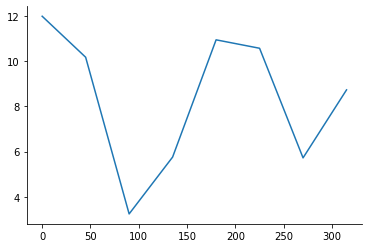

In [61]:
plt.plot(np.arange(0,360,45),best_ori)

In [41]:
best_ori-45

0.0

In [35]:
np.shape(ori_tuning)

(8, 3)

In [22]:
np.shape(ori_tuning[:,:,np.argmax(ori_tuning,2)])

(8, 3, 8, 3)

In [66]:
leftright_MI(left_gaze, right_gaze)

array([-0.00675347, -0.0118292 ,  0.00832276,  0.03449325, -0.10376603,
       -0.10463302,  0.01324632, -0.10056071,  0.01334733, -0.02820267,
        0.07931412,  0.05374299,  0.00889631, -0.02056436, -0.04327141,
        0.00324675,  0.10148027,  0.05818143, -0.06209305, -0.01450556,
       -0.04023719,  0.04801589,  0.07201374, -0.06819763, -0.07369473,
       -0.06735692, -0.06968641, -0.02532702, -0.15238576, -0.09282739,
       -0.04554095, -0.10095406, -0.01297015, -0.05423463, -0.08307094,
        0.00896087, -0.07177072, -0.06059559, -0.02500413, -0.14288843,
       -0.13249   , -0.14715187,  0.09532351, -0.1006123 , -0.2006775 ,
       -0.01477213, -0.05454126, -0.03748218,  0.08655667, -0.05798926,
        0.03841824,  0.01982027, -0.04221402,  0.02078943,  0.05178228,
       -0.03799545,  0.13505706,  0.11544958,  0.12819473, -0.07279461,
       -0.00312274, -0.09678467, -0.00204429, -0.08867159,  0.08924333,
       -0.06158102, -0.05992343,  0.14448481,  0.11899149, -0.03

In [69]:
[col for col in hffm_pop.data.columns.values if 'movement' in col]

['movement_psth_type_simple', 'movement_psth_type']

In [110]:
all_grat = []

hffm_pop.data['gaze_sacc_LRMI'] = np.nan
hffm_pop.data['comp_sacc_LRMI'] = np.nan
hffm_pop.data['gratings_LRMI'] = np.nan

for ind, row in hffm_pop.data.iterrows():
    
    if row['movement_psth_type_simple'] in ['early','late','biphasic','negative']:
    
        left_gaze = row['fm1_upsacc_avg_gaze_shift_dEye'] # actually right direction, but it's defined from the cameras perspective in this dataset
        right_gaze = row['fm1_downsacc_avg_gaze_shift_dEye']

        left_comp = row['fm1_upsacc_avg_comp_dEye']
        right_comp = row['fm1_downsacc_avg_comp_dEye']

        if row['movement_psth_type_simple'] != 'negative':
            hffm_pop.data.at[ind, 'gaze_sacc_LRMI'] = leftright_MI(np.max(left_gaze), np.max(right_gaze))
            hffm_pop.data.at[ind, 'comp_sacc_LRMI'] = leftright_MI(np.max(left_comp), np.max(right_comp))
        elif row['movement_psth_type_simple'] == 'negative':
            hffm_pop.data.at[ind, 'gaze_sacc_LRMI'] = leftright_MI(np.min(left_gaze), np.min(right_gaze))
            hffm_pop.data.at[ind, 'comp_sacc_LRMI'] = leftright_MI(np.min(left_comp), np.min(right_comp))
    
    if row['responsive_to_gratings']:
        ori = row['hf3_gratings_ori_tuning_tf']
        best_sf = np.roll(ori[:,np.argmax(np.mean(ori,0))], shift=-1, axis=0)
        left_grat = best_sf[0]
        right_grat = best_sf[4]
        hffm_pop.data.at[ind, 'gratings_LRMI'] = leftright_MI(left_grat, right_grat)
        all_grat.append(best_sf)
    

In [74]:
def stderr(s):
    return np.nanstd(s) / np.sqrt(np.size(s,0))

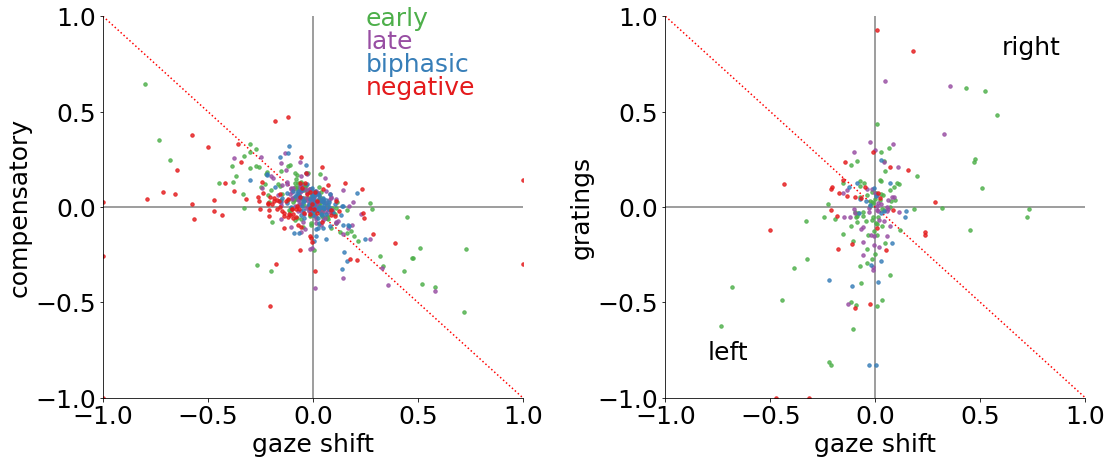

In [134]:
plt.subplots(1,2,figsize=(16,7))
names = ['early','late','biphasic','negative']
for p in range(2):
    plt.subplot(1,2,p+1)
    plt.plot([-1,1],[1,-1],'r:')
    plt.vlines(0,-1,1,color='k',alpha=0.5)
    plt.hlines(0,-1,1,color='k',alpha=0.5)
    for i in range(4):
        name = names[i]
        gaze_mi = hffm_pop.data['gaze_sacc_LRMI'][hffm_pop.data['movement_psth_type_simple']==name]
        if p == 0:
            comp_mi = hffm_pop.data['comp_sacc_LRMI'][hffm_pop.data['movement_psth_type_simple']==name]
        elif p==1:
            comp_mi = hffm_pop.data['gratings_LRMI'][hffm_pop.data['movement_psth_type_simple']==name]
        c = hffm_pop.cmap_movclusts[1:][i]
        plt.plot(gaze_mi, comp_mi, '.', color=c, alpha=0.8, markersize=7)
#         plt.vlines(np.mean(gaze_mi), np.mean(comp_mi)-(stderr(comp_mi)/2), np.mean(comp_mi)+(stderr(comp_mi)/2), color=c, linewidth=8)
#         plt.hlines(np.mean(comp_mi), np.mean(gaze_mi)-(stderr(gaze_mi)/2), np.mean(gaze_mi)+(stderr(gaze_mi)/2), color=c, linewidth=8)
    plt.xlim([-1,1]); plt.ylim([-1,1])
    if p==0:
        plt.xlabel('gaze shift'); plt.ylabel('compensatory')
        vstart = 0.95
        vgap = 0.12
        plt.annotate('early', xy=[0.25,vstart], color=hffm_pop.cmap_movclusts[1])
        plt.annotate('late', xy=[0.25,vstart-(vgap*1)], color=hffm_pop.cmap_movclusts[2])
        plt.annotate('biphasic', xy=[0.25,vstart-(vgap*2)], color=hffm_pop.cmap_movclusts[3])
        plt.annotate('negative', xy=[0.25,vstart-(vgap*3)], color=hffm_pop.cmap_movclusts[4])
    elif p==1:
        plt.xlabel('gaze shift'); plt.ylabel('gratings')
        plt.annotate('right', xy=[0.6,0.8], color='k')
        plt.annotate('left', xy=[-0.8,-0.8], color='k')
plt.tight_layout()
plt.show()

(array([ 6.,  2., 12., 25., 95., 96., 23.,  3.,  4.,  3.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

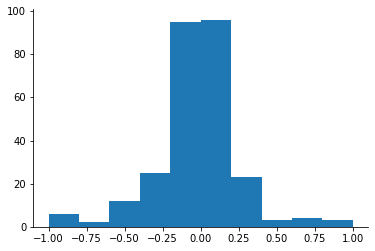

In [113]:
plt.hist(hffm_pop.data['gratings_LRMI'])